# Análisis de datos - Precios

## Librerías y fecha

In [1]:
from pydataxm import *                           #Se realiza la importación de las librerias necesarias para ejecutar
import datetime as dt
from datetime import timedelta
from pydataxm.pydataxm import ReadDB as apiXM    #Se importa la clase que invoca el servicio
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
objetoAPI = pydataxm.ReadDB()

In [3]:
today_m = dt.datetime.now() #este preciso instante
day_m = today_m.day #calculo el dia de hoy (int)
last_day_previous_month = today_m - timedelta(day_m) #obtengo la fecha del ultimo día del mes anterior
last_day_previous_month

datetime.datetime(2022, 2, 28, 9, 31, 11, 588769)

In [4]:
year_m1, month_m1, day_m1 = last_day_previous_month.year, last_day_previous_month.month, last_day_previous_month.day

## Precio de Bolsa

### Obtención

In [5]:
df = apiXM.request_data(
    objetoAPI, #Se indica el objeto que contiene el serivicio
    "PrecBolsNaci", #Se indica el nombre de la métrica tal como se llama en el campo metricID
    0, #Campo númerico indicando el nivel de desagregación, 1 para valores por Recurso
    dt.date(year_m1, month_m1, 1), #Corresponde a la fecha inicial de la consulta
    dt.date(year_m1, month_m1, day_m1)) #Corresponde a la fecha final de la consulta

#df

### Procesamiento

In [6]:
df['Date'] = pd.to_datetime(df['Date']) #establecemos la columna Date como datetime
df.index = df['Date'] #establecemos el índice como la columna Date
df = df.drop(columns=['Id', 'Values_code', 'Date']) #eliminamos columnas innecesarias
df['$/kWh'] = df.mean(axis=1)
df = df.drop(df.loc[:, 'Values_Hour01':'Values_Hour24'].columns, axis = 1) #eliminar todas columnas entre 01 y 24 horas
df

,$/kWh
Date,
2022-02-01,574.822500
2022-02-02,629.747083
2022-02-03,679.943333
2022-02-04,634.936667
2022-02-05,676.137917
2022-02-06,643.966667
2022-02-07,620.809583
2022-02-08,556.765000
2022-02-09,481.749167


### Visualización

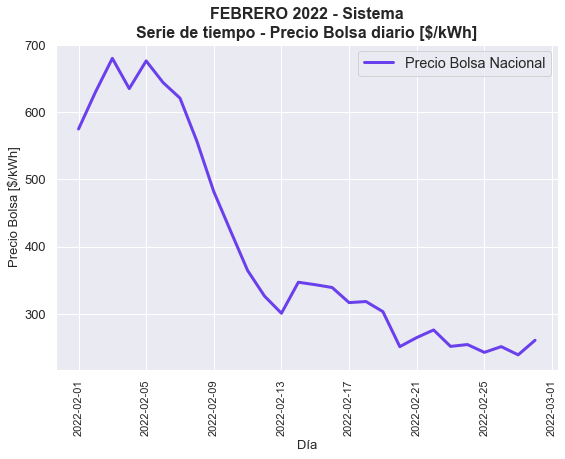

In [7]:
if month_m1 == 1:
    month_str = '01_ENERO'
elif month_m1 == 2:
    month_str = '02_FEBRERO'
elif month_m1 == 3:
    month_str = '03_MARZO'
elif month_m1 == 4:
    month_str = '04_ABRIL'
elif month_m1 == 5:
    month_str = '05_MAYO'
elif month_m1 == 6:
    month_str = '06_JUNIO'
elif month_m1 == 7:
    month_str = '07_JULIO'
elif month_m1 == 8:
    month_str = '08_AGOSTO'
elif month_m1 == 9:
    month_str = '09_SEPTIEMBRE'
elif month_m1 == 10:
    month_str = '10_OCTUBRE'
elif month_m1 == 11:
    month_str = '11_NOVIEMBRE'
elif month_m1 == 12:
    month_str = '12_DICIEMBRE'

sns.set()

labels = ['Precio Bolsa Nacional']
plt.figure(figsize=(9,6))
plt.plot(
    df.index,
    df['$/kWh'],
    linewidth=3.0,
    color='#6a40ed'
)

plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=13)
plt.title(f'{month_str[3:]} {str(year_m1)} - Sistema\nSerie de tiempo - Precio Bolsa diario [$/kWh]', fontsize=16, fontweight='bold')
plt.ylabel('Precio Bolsa [$/kWh]', fontsize=13)
plt.xlabel('Día', fontsize=13)
plt.legend(labels=labels, fontsize="large")
plt.show()

## Precio contratos regulados

### Obtención

In [8]:
df = apiXM.request_data(
    objetoAPI, #Se indica el objeto que contiene el serivicio
    "PrecPromContRegu", #Se indica el nombre de la métrica tal como se llama en el campo metricID
    0, #Campo númerico indicando el nivel de desagregación, 1 para valores por Recurso
    dt.date(year_m1, month_m1, 1), #Corresponde a la fecha inicial de la consulta
    dt.date(year_m1, month_m1, day_m1)) #Corresponde a la fecha final de la consulta

#df

### Procesamiento

In [9]:
df['Date'] = pd.to_datetime(df['Date']) #establecemos la columna Date como datetime
df.index = df['Date'] #establecemos el índice como la columna Date
df = df.drop(columns=['Id', 'Values_code', 'Date']) #eliminamos columnas innecesarias
df['$/kWh'] = df.mean(axis=1)
df = df.drop(df.loc[:, 'Values_Hour01':'Values_Hour24'].columns, axis = 1) #eliminar todas columnas entre 01 y 24 horas
df

,$/kWh
Date,
2022-02-01,266.788333
2022-02-02,267.127917
2022-02-03,267.536667
2022-02-04,267.214583
2022-02-05,266.992500
2022-02-06,265.608750
2022-02-07,266.662917
2022-02-08,266.526667
2022-02-09,266.126250


### Visualización

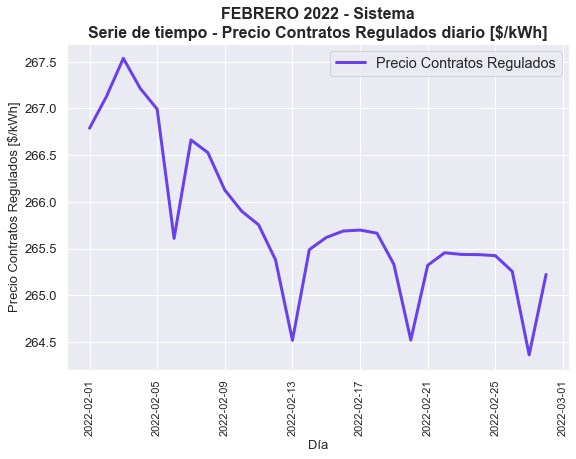

In [10]:
if month_m1 == 1:
    month_str = '01_ENERO'
elif month_m1 == 2:
    month_str = '02_FEBRERO'
elif month_m1 == 3:
    month_str = '03_MARZO'
elif month_m1 == 4:
    month_str = '04_ABRIL'
elif month_m1 == 5:
    month_str = '05_MAYO'
elif month_m1 == 6:
    month_str = '06_JUNIO'
elif month_m1 == 7:
    month_str = '07_JULIO'
elif month_m1 == 8:
    month_str = '08_AGOSTO'
elif month_m1 == 9:
    month_str = '09_SEPTIEMBRE'
elif month_m1 == 10:
    month_str = '10_OCTUBRE'
elif month_m1 == 11:
    month_str = '11_NOVIEMBRE'
elif month_m1 == 12:
    month_str = '12_DICIEMBRE'

sns.set()

labels = ['Precio Contratos Regulados']
plt.figure(figsize=(9,6))
plt.plot(
    df.index,
    df['$/kWh'],
    linewidth=3.0,
    color='#6a40ed'
)

plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=13)
plt.title(f'{month_str[3:]} {str(year_m1)} - Sistema\nSerie de tiempo - Precio Contratos Regulados diario [$/kWh]', fontsize=16, fontweight='bold')
plt.ylabel('Precio Contratos Regulados [$/kWh]', fontsize=13)
plt.xlabel('Día', fontsize=13)
plt.legend(labels=labels, fontsize="large")
plt.show()

## Precio contratos no regulados

### Obtención

In [11]:
df = apiXM.request_data(
    objetoAPI, #Se indica el objeto que contiene el serivicio
    "PrecPromContNoRegu", #Se indica el nombre de la métrica tal como se llama en el campo metricID
    0, #Campo númerico indicando el nivel de desagregación, 1 para valores por Recurso
    dt.date(year_m1, month_m1, 1), #Corresponde a la fecha inicial de la consulta
    dt.date(year_m1, month_m1, day_m1)) #Corresponde a la fecha final de la consulta

#df

### Procesamiento

In [12]:
df['Date'] = pd.to_datetime(df['Date']) #establecemos la columna Date como datetime
df.index = df['Date'] #establecemos el índice como la columna Date
df = df.drop(columns=['Id', 'Values_code', 'Date']) #eliminamos columnas innecesarias
df['$/kWh'] = df.mean(axis=1)
df = df.drop(df.loc[:, 'Values_Hour01':'Values_Hour24'].columns, axis = 1) #eliminar todas columnas entre 01 y 24 horas
df

,$/kWh
Date,
2022-02-01,248.548750
2022-02-02,248.915833
2022-02-03,248.888333
2022-02-04,248.170833
2022-02-05,248.877500
2022-02-06,249.825000
2022-02-07,248.860000
2022-02-08,248.098750
2022-02-09,246.959167


### Visualización

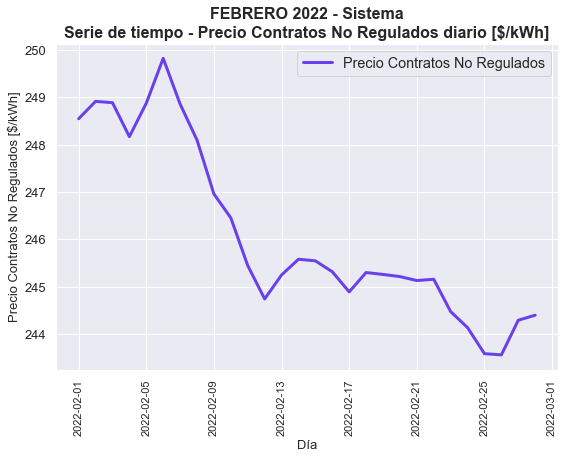

In [13]:
if month_m1 == 1:
    month_str = '01_ENERO'
elif month_m1 == 2:
    month_str = '02_FEBRERO'
elif month_m1 == 3:
    month_str = '03_MARZO'
elif month_m1 == 4:
    month_str = '04_ABRIL'
elif month_m1 == 5:
    month_str = '05_MAYO'
elif month_m1 == 6:
    month_str = '06_JUNIO'
elif month_m1 == 7:
    month_str = '07_JULIO'
elif month_m1 == 8:
    month_str = '08_AGOSTO'
elif month_m1 == 9:
    month_str = '09_SEPTIEMBRE'
elif month_m1 == 10:
    month_str = '10_OCTUBRE'
elif month_m1 == 11:
    month_str = '11_NOVIEMBRE'
elif month_m1 == 12:
    month_str = '12_DICIEMBRE'

sns.set()

labels = ['Precio Contratos No Regulados']
plt.figure(figsize=(9,6))
plt.plot(
    df.index,
    df['$/kWh'],
    linewidth=3.0,
    color='#6a40ed'
)

plt.xticks(rotation=90, fontsize=11)
plt.yticks(fontsize=13)
plt.title(f'{month_str[3:]} {str(year_m1)} - Sistema\nSerie de tiempo - Precio Contratos No Regulados diario [$/kWh]', fontsize=16, fontweight='bold')
plt.ylabel('Precio Contratos No Regulados [$/kWh]', fontsize=13)
plt.xlabel('Día', fontsize=13)
plt.legend(labels=labels, fontsize="large")
plt.show()

Cŕeditos: Ing. Juan Camilo Jaramillo Tascón https://www.linkedin.com/in/juancjaramillot/